In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
ls: .: No such file or directory


In [20]:
attribute1 = "BF_ADV"
attribute2 = "FC_ADV"

method_dict = {0 : "KMeans", 1 : "Agglo"}

method = method_dict[0]

# d3f2 = pd.read_csv("temp/cdf-clustering/"+attribute2+"/"+method+"/labels.csv")

df1 = pd.read_csv("temp/cdf-clustering/"+attribute1+"/"+method+"/labels.csv")
df2 = pd.read_csv("temp/cdf-clustering/"+attribute2+"/"+method+"/labels.csv")

del df1['Unnamed: 0']
del df2['Unnamed: 0']

df1.columns = ["District", attribute1]
df2.columns = ["District", attribute2]

df = df1.merge(df2, how='inner', on='District')

mat = confusion_matrix(df[attribute1], df[attribute2])
np.sum(mat)
mat

mat = np.vstack((mat, np.sum(mat, axis = 0)))
mat = np.hstack((mat, np.sum(mat, axis = 1).reshape(len(np.sum(mat, axis = 1)), 1)))
print(mat)
np.savetxt("confusion-matrix/"+method+"/"+attribute1+"_"+attribute2+".csv", mat, delimiter=", ", fmt="%d")

[[  5   0   1   1   0   9   0  16]
 [ 15   1  42   2   4   1   0  65]
 [  4   0   2   2   1   0   2  11]
 [ 25   2   9   2   2   7   0  47]
 [  1   4   3   0   4   1   1  14]
 [  2   1   3   1   1   1   0   9]
 [  3   0   1   0   2   2   1   9]
 [ 55   8  61   8  14  21   4 171]]


In [6]:
import seaborn as sns

In [66]:
df_bf_sns = pd.read_csv("seaborn/bf_adv.csv")
del df_bf_sns["Unnamed: 0"]
df_fc_sns = pd.read_csv("seaborn/fc_adv.csv")
del df_fc_sns["Unnamed: 0"]
df_bf_sns['attribute'] = "BF_ADV"
df_fc_sns['attribute'] = "FC_ADV"

In [79]:
df_bf_sns_temp = df_bf_sns[df_bf_sns["cluster"] == 3]
att1_dists = len(df_bf_sns_temp)/10
df_fc_sns_temp = df_fc_sns[df_fc_sns["cluster"] == 2]
att2_dists = len(df_fc_sns_temp)/10

In [80]:
districts = np.intersect1d(np.asarray(df_bf_sns_temp["district"]), np.asarray(df_fc_sns_temp["district"]))

In [81]:
df1 = df_bf_sns[df_bf_sns['district'].isin(districts)]
df2 = df_fc_sns[df_fc_sns['district'].isin(districts)]
df = df1.append(df2)
df

,percentile,value,cluster,district,attribute
830,0.1,2.748900,3,222,BF_ADV
831,0.2,2.581586,3,222,BF_ADV
832,0.3,1.679078,3,222,BF_ADV
833,0.4,1.594630,3,222,BF_ADV
834,0.5,1.007406,3,222,BF_ADV
835,0.6,0.610149,3,222,BF_ADV
836,0.7,0.577900,3,222,BF_ADV
837,0.8,0.319745,3,222,BF_ADV
838,0.9,0.142530,3,222,BF_ADV
839,1.0,0.000000,3,222,BF_ADV


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


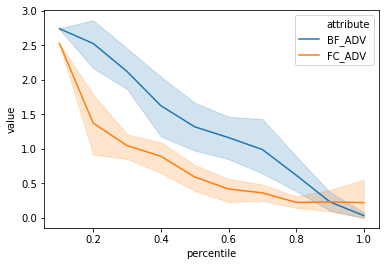

In [82]:
plot = sns.lineplot(x="percentile", y="value", hue="attribute", data=df).set_title(attribute1+" cluster 3 - #"+att1_dists+ attribute2+" cluster 2 - #"+att2_dists)